In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

## VGChartz and Metacritics Merged Table

In [2]:
df = pd.read_csv('merge.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Let It Die,PlayStation 4,2020.0,Action,GungHo,0.00,0.01,0.01,0.00,0.01,72.0,38.0,7.1,252.0,Grasshopper Manufacture,M
1,Senran Kagura: Estival Versus,PlayStation 4,2016.0,Action,Xseed Games,0.08,0.00,0.09,0.02,0.18,67.0,25.0,7.8,166.0,"Tamsoft, Marvelous Inc.",M
2,Thief,Xbox One,2014.0,Fantasy,Square Enix,0.26,0.17,0.00,0.04,0.48,69.0,21.0,6.1,297.0,Eidos Montreal,M
3,Darksiders III,PC,2018.0,Action Adventure,THQ Nordic,0.00,0.01,0.00,0.00,0.01,70.0,43.0,7.1,595.0,"Gunfire Games, THQ Nordic",M
4,Darksiders III,Xbox One,2018.0,Action Adventure,THQ Nordic,0.11,0.00,0.00,0.01,0.12,69.0,19.0,7.1,147.0,"Gunfire Games, THQ Nordic",M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8290,Shogun: Total War,PC,2000.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01,84.0,24.0,8.4,120.0,Creative Assembly,T
8291,Saiyuki: Journey West,PlayStation,2001.0,Strategy,KOEI,0.03,0.02,0.00,0.00,0.05,73.0,9.0,8.2,17.0,Koei,E
8292,Pharaoh,PC,1999.0,Strategy,Sierra Entertainment,0.00,0.02,0.00,0.00,0.02,NaN,NaN,8.6,56.0,Impressions Games,E
8293,Sim Theme Park,PC,1999.0,Strategy,Electronic Arts,2.04,0.04,0.00,0.00,2.08,NaN,NaN,8.0,19.0,Bullfrog Productions,E


## Game count visualization by different parameters

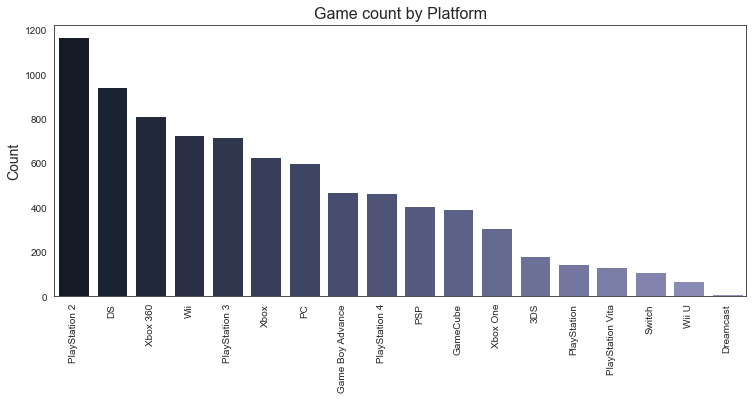

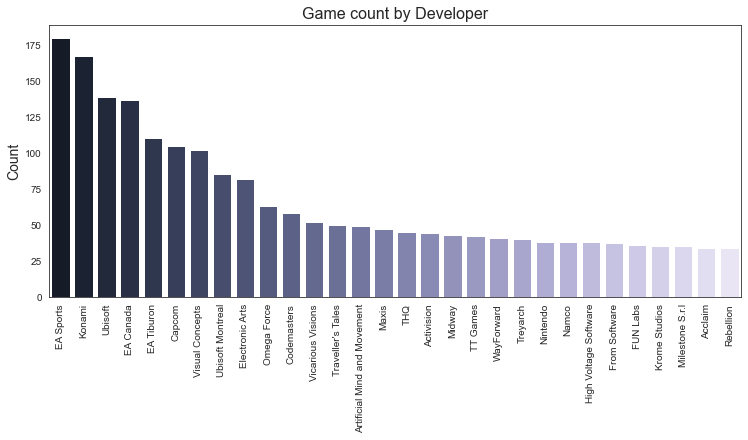

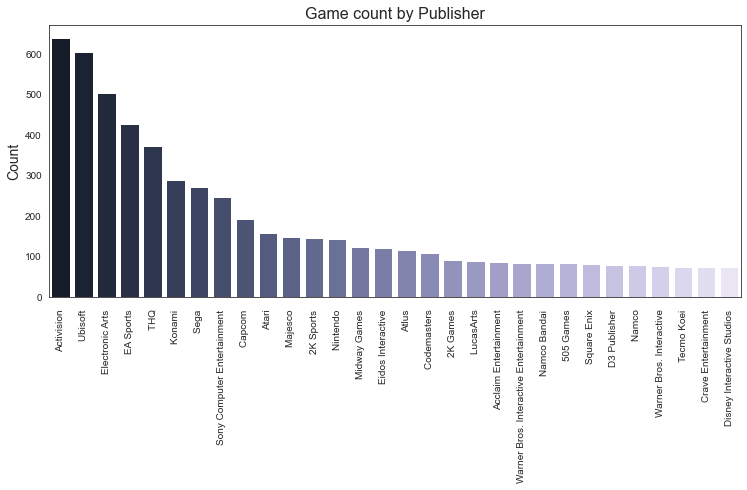

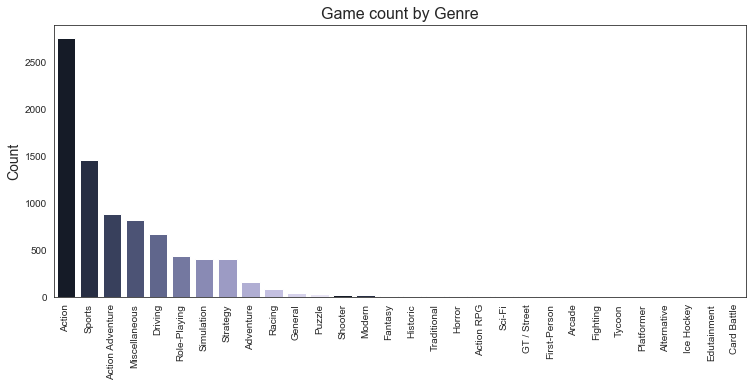

In [3]:
import matplotlib.pyplot as plt
   
cols = ['Platform', 'Developer', 'Publisher', 'Genre']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), start=2.8, rot=.1, dark=0.1, light=.90, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

## Sales vs Scores

### Critic Scores

In [4]:
def score_group(score):
    if score >= 90:
        return '90-100'
    elif score >= 80:
        return '80-89'
    elif score >= 70:
        return '70-79'
    elif score >= 60:
        return '60-69'
    elif score >= 50:
        return '50-59'
    else:
        return '0-49'

In [5]:
dfh = df.dropna(subset=['Critic_Score']).reset_index(drop=True)
dfh['Score_Group'] = dfh['Critic_Score'].apply(lambda x: score_group(x))

In [6]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

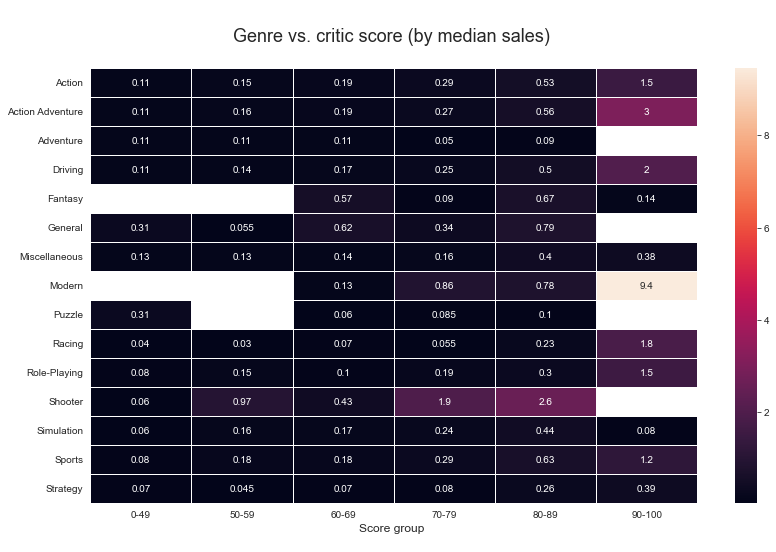

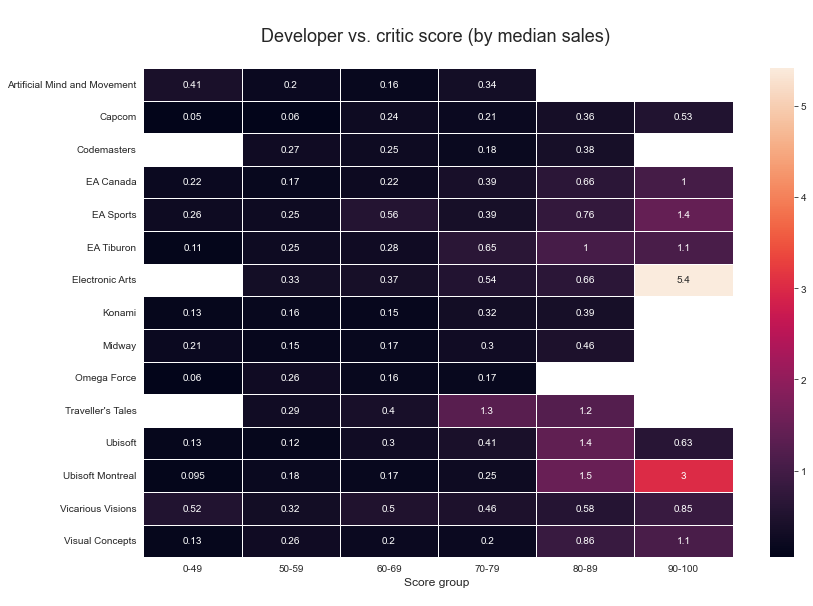

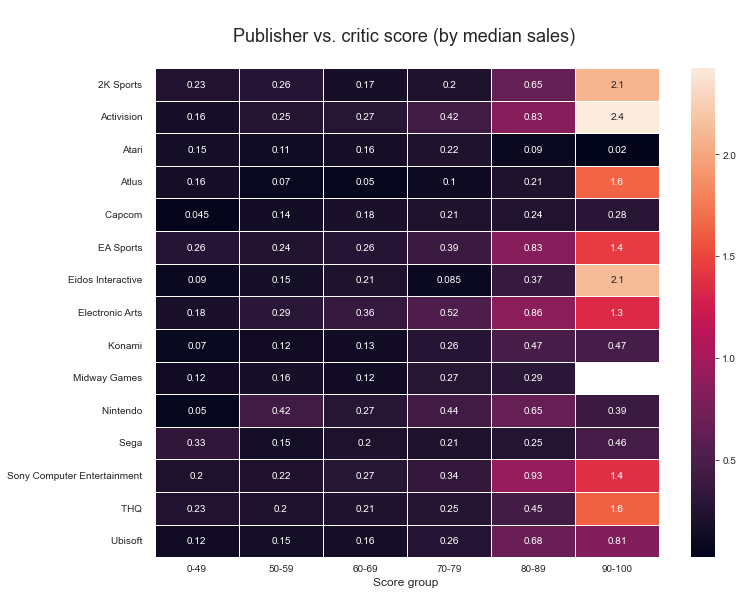

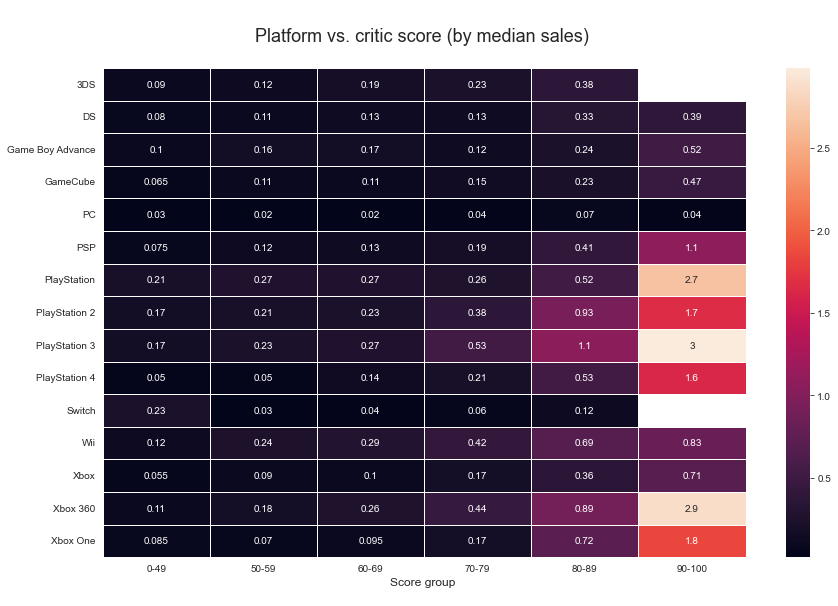

In [7]:
cols = ['Genre', 'Developer', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = dfh[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col, 'Score_Group', 'Global_Sales']].groupby([col, 'Score_Group']).median().reset_index().pivot(col, "Score_Group", "Global_Sales")
    plt.figure(figsize=(width(col), height(col)))
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. critic score (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []

In [8]:
## Dataset Correlations

In [9]:
cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
for col in cols:
    uniques = df[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df.loc[df[col] == k, col] = v

In [10]:
df1 = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df1 = df1.dropna().reset_index(drop=True)
df1 = df1.astype('float64')

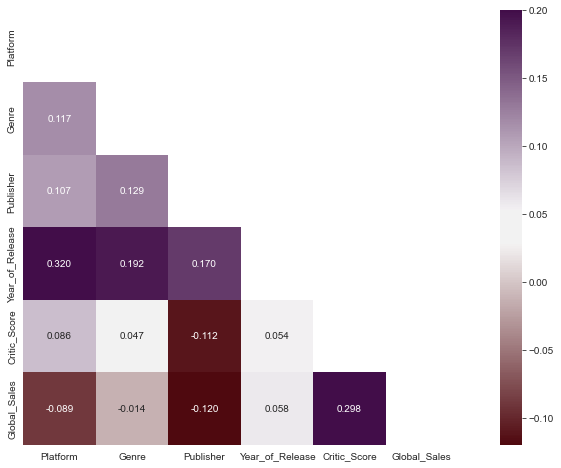

In [11]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(730, 300, sep=20, as_cmap=True, s=85, l=15, n=20) # note: 680, 350/470
with sns.axes_style("white"):
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    ax = sns.heatmap(df1.corr(), mask=mask, vmax=0.2, square=True, annot=True, fmt=".3f", cmap=cmap)

[(0.0, 17.5)]

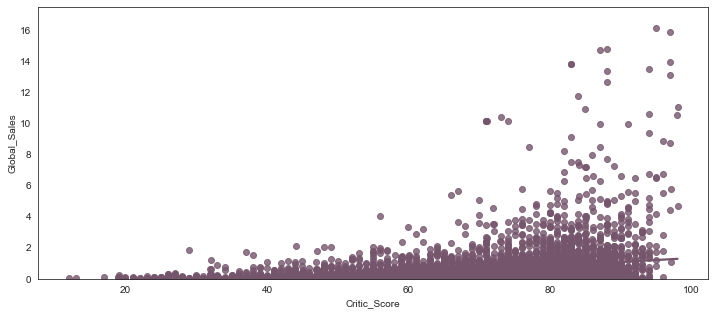

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df1, ci=None, color="#75556c", x_jitter=.02).set(ylim=(0, 17.5))

[(0.0, 4.0), (50.0, 95.0)]

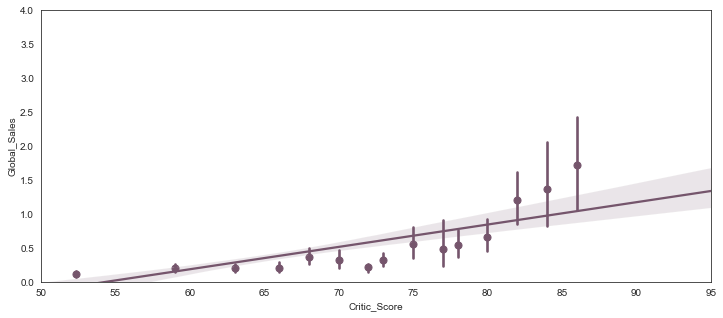

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df1.loc[df1.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="#75556c").set(ylim=(0, 4), xlim=(50, 95))

In [14]:
dfb = df[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
df2['Hit'] = df2['Global_Sales']
df2.drop('Global_Sales', axis=1, inplace=True)

In [15]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

C:\Users\Niv\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


<AxesSubplot:xlabel='Critic_Score', ylabel='Hit'>

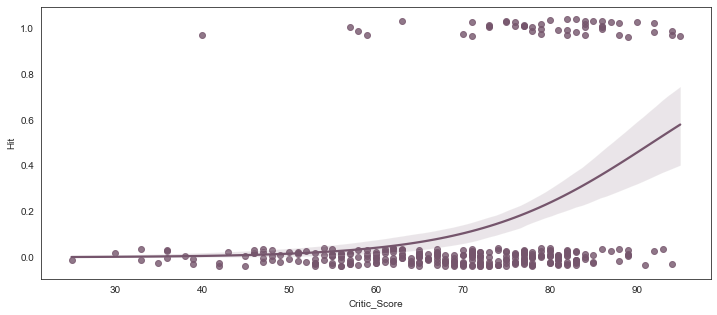

In [16]:
# Logistic regression plot with sample of the data
n = ceil(0.05 * len(df2['Hit']))
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Hit", data=df2.sample(n=n),
            logistic=True, n_boot=500, y_jitter=.04, color="#75556c")

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn import svm

In [18]:
df2

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,8,0,268,2020.0,72.0,0
1,8,0,52,2016.0,67.0,0
2,11,14,23,2014.0,69.0,0
3,6,2,54,2018.0,70.0,0
4,11,2,54,2018.0,69.0,0
...,...,...,...,...,...,...
6634,6,7,2,2000.0,84.0,1
6635,0,7,35,2002.0,72.0,0
6636,6,7,2,2000.0,84.0,0
6637,13,7,35,2001.0,73.0,0


In [19]:
from pandas import get_dummies
df_copy = pd.get_dummies(df2)

C:\Users\Niv\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\algorithms.py:794: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [20]:
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,Platform_0,Platform_1,Platform_2,Platform_3,Platform_4,Platform_5,Platform_6,...,Publisher_310,Publisher_312,Publisher_315,Publisher_316,Publisher_317,Publisher_319,Publisher_320,Publisher_322,Publisher_325,Publisher_326
0,2020.0,72.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016.0,67.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014.0,69.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018.0,70.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2018.0,69.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=2)

In [23]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8891566265060241


In [24]:
log_reg = LogisticRegression().fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.8849397590361445


C:\Users\Niv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
all_predictions = radm.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2877
           1       0.66      0.34      0.45       443

    accuracy                           0.89      3320
   macro avg       0.78      0.66      0.70      3320
weighted avg       0.87      0.89      0.87      3320



Text(0.5, 1.0, 'Training Set Confusion Matrix')

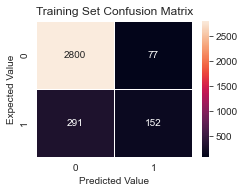

In [26]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')

In [27]:
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking (top 10):')

for f in range(10):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df3.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking (top 10):
1. feature 1 Critic_Score (0.317367)
2. feature 0 Year_of_Release (0.155021)
3. feature 62 Publisher_2 (0.026974)
4. feature 20 Genre_0 (0.023649)
5. feature 2 Platform_0 (0.019523)
6. feature 6 Platform_4 (0.019473)
7. feature 21 Genre_1 (0.018149)
8. feature 4 Platform_2 (0.014672)
9. feature 91 Publisher_31 (0.014664)
10. feature 22 Genre_2 (0.014643)


In [28]:
not_hit_copy = df_copy[df_copy['Hit'] == 0]

In [29]:
df4 = not_hit_copy
y = df4['Hit'].values
df4 = df4.drop(['Hit'],axis=1)
X = df4.values

In [30]:
pred = radm.predict_proba(X)

In [31]:
dfb = dfb[dfb['Global_Sales'] < 1]

In [32]:
dfb['Hit_Probability'] = pred[:,1]

In [33]:
dfb = dfb[dfb['Year_of_Release'] == 2018]
dfb.sort_values(['Hit_Probability'], ascending=[False], inplace=True)
dfb = dfb[['Name', 'Platform', 'Hit_Probability']]

In [34]:
dfb[:10].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,NHL 19,11,0.93
1,NBA Live 19,8,0.50
2,Tetris Effect,8,0.47
3,Yoku's Island Express,11,0.46
4,Pro Evolution Soccer 2019,11,0.46
5,Burnout Paradise Remastered,8,0.44
6,Overcooked! 2,11,0.44
7,A Way Out,8,0.36
8,Just Cause 4,8,0.33
9,EA Sports UFC 3,11,0.32


In [35]:
dfb[:-11:-1].reset_index(drop=True)

,Name,Platform,Hit_Probability
0,Armello,8,0.0
1,Mega Man X Legacy Collection 2,15,0.0
2,Mega Man X Legacy Collection 2,8,0.0
3,Candle: The Power of the Flame,15,0.0
4,Salt and Sanctuary,15,0.0
5,Persona 5: Dancing in Starlight,8,0.0
6,Musynx,15,0.0
7,Capcom Beat 'Em Up Bundle,8,0.0
8,The Raven Remastered,8,0.0
9,The Raven Remastered,11,0.0
